In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg    	min    
0  	300   	21338.4	228.437
1  	236   	20845.8	228.437
2  	240   	20588  	245.283
3  	229   	20473.5	197.37 
4  	232   	20479.8	197.37 
5  	234   	20346.6	177.945
6  	238   	20244.1	307.571
7  	223   	20154.3	295.661
8  	229   	20106.6	183.565
9  	241   	20079  	208.236
10 	231   	19951.4	242.19 
11 	232   	19859.5	265.899
12 	249   	19886.8	176.869
13 	222   	19841.9	301.838
14 	206   	19584.6	361.049
15 	227   	19596.2	204.931
16 	238   	19644.8	204.931
17 	236   	19763.1	197.434
18 	227   	19633.6	174.707
19 	240   	19661.1	204.931
20 	233   	19776.6	204.931
21 	237   	19817.8	204.931
22 	222   	19631.4	204.931
23 	244   	19678.4	230.334
24 	228   	19524.3	231.059
25 	223   	19556.6	231.968
26 	234   	19465.5	274.339
27 	217   	19108.4	258.846
28 	251   	18875.9	213.122
29 	219   	18555.8	312.974
30 	232   	18333.1	250.338
31 	225   	18094.3	370.857
32 	221   	17862.5	294.589
33 	216   	17530.7	343.28 
34 	211   	17197.4	395.204
35 	221   	17068.4	305.128
3

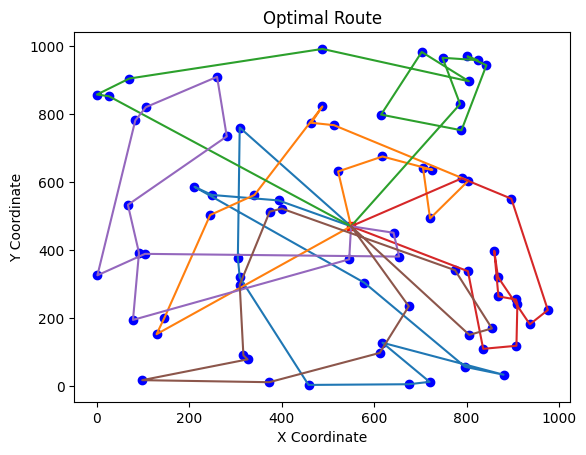

In [37]:
# Task 1 - Define the number of locations and vehicles
num_locations = 75# Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (550, 470)  # Define the central depot location as a fixed point
num_vehicles = 6  # Define how many vehicles are available to visit the locations

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

# Task 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

#### Additional Tasks for the Vehicle Routing Project (Optional but highly recommended)

#### 1. Parameter Tuning:
#### Task: Vary parameters like population size, mutation rate, or tournament size. Analyze their impact on the results.
#### Purpose: Learn the importance of parameter tuning in genetic algorithms and how it affects outcomes.

#### 2. Fitness Score Analysis Over Generations:
#### Task: Plot the fitness score of the best individual over generations for different configurations.
#### Purpose: Visualize and understand the convergence behavior of the algorithm under different settings.

#### 3. Solution Diversity Analysis:
#### Task: Implement a method to measure and report the diversity of solutions in the population over time.
#### Purpose: Explore the balance between exploration and exploitation in genetic algorithms.

#### 4. Take a map of a City and also its road network and try to solve this using graph algorithms